### Importing Libraries

In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

### Dataset Load

In [2]:
data=pd.read_csv("netflix_titles.csv")
df=pd.DataFrame(data)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.columns 

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


In [6]:
df.shape

(8807, 12)

### Check for Null values

In [7]:
## Check for Null values using isnull() function
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<AxesSubplot:>

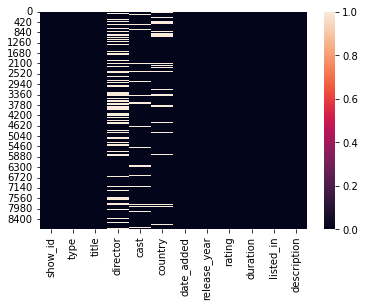

In [8]:
sns.heatmap(df.isnull())

### Missing value imputation

In [9]:
#replacing the missing value with mode
df['director'] = df['director'].fillna(df['director'].mode()[0])
df['cast'] = df['cast'].fillna(df['cast'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['director'] = df['director'].fillna(df['director'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

### Separating the date_added to days,year,week and months columns

In [12]:
#separating the date_added to days,year and months columns
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
print("Date:\n",df['day_added'])
df['year_added'] = df['date_added'].dt.year
print("Year:\n",df['year_added'])
df['month_added']=df['date_added'].dt.month
print("Month:\n",df['month_added'])
df['year_added'].astype(int)
df['day_added'].astype(int)
df['weekday'] = df['date_added'].dt.weekday #returns 0 to 6
df['weekday']

Date:
 0       25
1       24
2       24
3       24
4       24
        ..
8802    20
8803     1
8804     1
8805    11
8806     2
Name: day_added, Length: 8807, dtype: int64
Year:
 0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
8802    2019
8803    2019
8804    2019
8805    2020
8806    2019
Name: year_added, Length: 8807, dtype: int64
Month:
 0        9
1        9
2        9
3        9
4        9
        ..
8802    11
8803     7
8804    11
8805     1
8806     3
Name: month_added, Length: 8807, dtype: int64


0       5
1       4
2       4
3       4
4       4
       ..
8802    2
8803    0
8804    4
8805    5
8806    5
Name: weekday, Length: 8807, dtype: int64

In [13]:
df1=df.drop(['show_id','date_added','description','director','cast'],axis=1)
df1.rename(columns = {'listed_in':'Genres','day_added':'date_added'}, inplace = True)
df1

,type,title,country,release_year,rating,duration,Genres,date_added,year_added,month_added,weekday
0,Movie,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,25,2021,9,5
1,TV Show,Blood & Water,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",24,2021,9,4
2,TV Show,Ganglands,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",24,2021,9,4
3,TV Show,Jailbirds New Orleans,United States,2021,TV-MA,1 Season,"Docuseries, Reality TV",24,2021,9,4
4,TV Show,Kota Factory,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",24,2021,9,4
...,...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers",20,2019,11,2
8803,TV Show,Zombie Dumb,United States,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",1,2019,7,0
8804,Movie,Zombieland,United States,2009,R,88 min,"Comedies, Horror Movies",1,2019,11,4
8805,Movie,Zoom,United States,2006,PG,88 min,"Children & Family Movies, Comedies",11,2020,1,5


In [14]:
# Lets retrieve just the first country
df1['country'] = df1['country'].apply(lambda x: x.split(",")[0])
df1['Genres'] = df1['Genres'].apply(lambda x: x.split(",")[0])
df1.to_csv("updatednetflix.csv")

## EDA

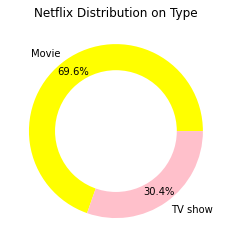

In [15]:
# Setting labels for items in Chart
labels = ['Movie', 'TV show']
size = df1['type'].value_counts()
  
# colors
colors = ['Yellow','Pink']
  
# Pie Chart
plt.pie(size, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Netflix Distribution on Type')
  
# Displaying Chart
plt.show()

In [16]:
df1['rating'].replace({'PG-13':'Above 13 years', 
                      'TV-MA':'Adult','PG': 
                      'Parental Guidance:Kids',
                      'TV-14':'Above 13 years',
                      'TV-PG':'Parental Guidance:Kids',
                      'TV-Y': 'Kids',
                      'TV-Y7': 'Kids above 7 years',
                      'R': 'Adult',
                      'TV-G':'Kids',
                      'G':'Kids',
                      'NC-17':'Adult',
                      '74 min':'Adult',
                      '84 min':'Adult',
                      '66 min':'Adult',
                      'UR':'Unrated',
                      'NR':'Unrated',
                      'TV-Y7-FV':'Kids above 7 years'},inplace=True)

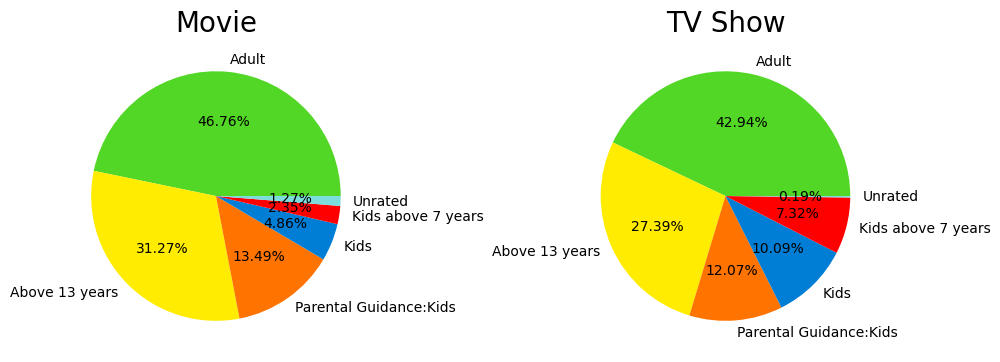

In [17]:
count=pd.DataFrame(df1['rating'].value_counts())
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,6),dpi=100)
mycolors=['#52D726','#FFEC00','#FF7300','#007ED6','#FF0000','#7CDDDD']
x=df1['rating'][df1.type=='Movie'].value_counts()
x1=df1['rating'][df1.type=='TV Show'].value_counts()
y=count.index
axes[0].pie(x,labels=y,colors=mycolors,autopct='%1.2f%%' )
axes[0].set_title('Movie',fontsize = 20)
axes[1].pie(x1,labels=y,colors=mycolors,autopct='%1.2f%%' )
axes[1].set_title('TV Show',fontsize = 20)
plt.tight_layout()
plt.show()

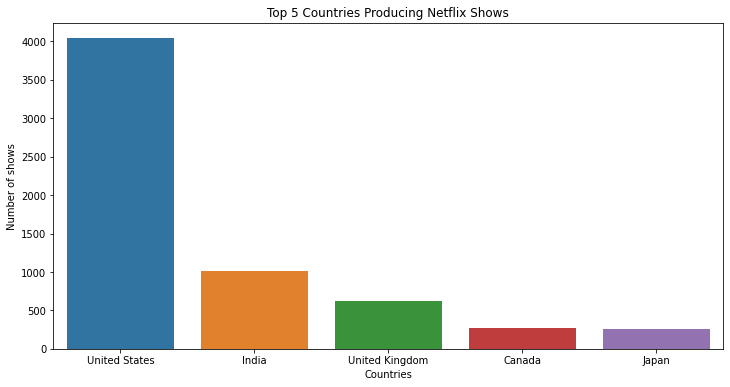

In [18]:
#top 5 country with number of shows
topfive=df1['country'].value_counts()[:5]
x1= topfive.index
y1= topfive.values
plt.figure(figsize=(12,6))
plt.title("Top 5 Countries Producing Netflix Shows")
plt.xlabel("Countries")
plt.ylabel("Number of shows")
sns.barplot(x=x1,y=y1)
plt.show()

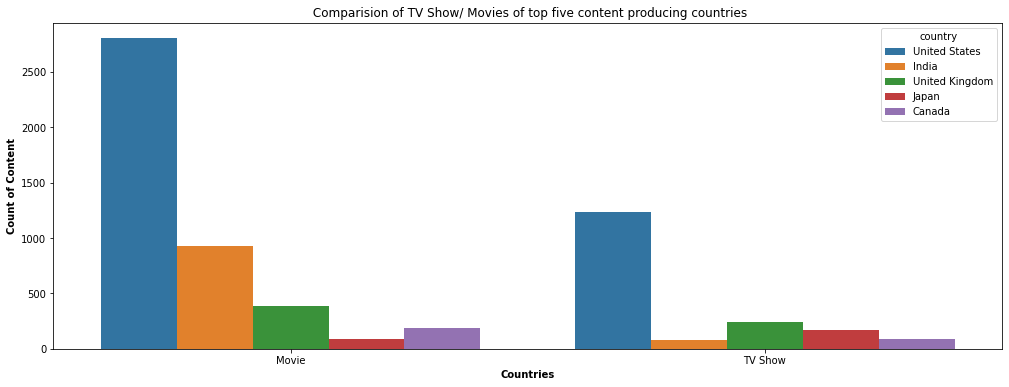

In [19]:
#let's see side by side comparision
x2=df1[df1['country'].isin(x1)]
plt.figure(figsize=(17,6))
plot = sns.countplot(x='type',data=x2,hue='country')
plot.set_ylabel("Count of Content",fontsize=10, weight='bold')
plot.set_xlabel("Countries",fontsize=10,weight='bold')
plt.legend(title='country', loc='upper right')
plt.title(' Comparision of TV Show/ Movies of top five content producing countries');

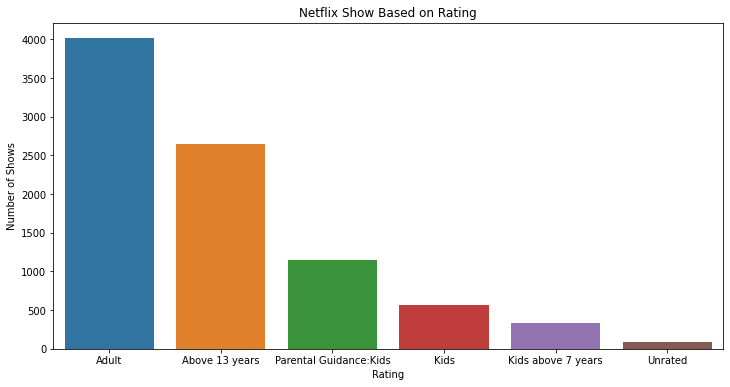

In [20]:
plt.figure(figsize = [12,6])
ax=sns.countplot(x = df1['rating'], order=df1['rating'].value_counts().index)
ax.set(xlabel='Rating', ylabel='Number of Shows')
plt.title("Netflix Show Based on Rating")
plt.show()

In [ ]:
#displaying the number of shows released yearwise
x1=df1[df1['year_added']>2015]
x=x1['year_added'].unique()
#x=df1['year_added'].unique()
y=x1['year_added'].value_counts()
plt.figure(figsize = [10,5])
ax=sns.barplot(x,y)
ax.set(xlabel='Year', ylabel='Number of Shows')
plt.title("Netflix Show Based on Year")
plt.show()

In [ ]:
df1['month_added'].replace({1:'January', 
                            2:'February',
                            3:'March',
                            4:'April',
                            5:'May',
                            6:'June',
                            7:'July',
                            8:'August',
                            9:'September',
                            10:'October',
                            11:'November',
                            12:'December'},inplace=True)

In [ ]:
#displaying the number of shows released monthwise
x=df1['month_added'].unique()
y=df1['month_added'].value_counts().sort_values(ascending=True)
plt.figure(figsize = [10,5])
ax=sns.barplot(x,y)
ax.set(xlabel='Month', ylabel='Number of Shows')
plt.xticks(rotation =45)
plt.title("Netflix Shows Based on Months")
plt.show()

In [ ]:
#displaying the number of shows released daywise
x=df1['date_added'].unique()
y=df1['date_added'].value_counts()
plt.figure(figsize = [10,6])
ax=sns.barplot(x,y)
ax.set(xlabel='Date', ylabel='Number of Shows')
plt.xticks(rotation =45)
plt.title("Netflix Shows Based on Dates")
plt.show()

In [ ]:
#highest weekwise shows
week1=df1[(df1['date_added']>=1) & (df1['date_added']<8)]
week2=df1[(df1['date_added']>=8) & (df1['date_added']<15)]
week3=df1[(df1['date_added']>=15) & (df1['date_added']<22)]
week4=df1[(df1['date_added']>=22) & (df1['date_added']<31)]

xweek = ['week 1','week 2','week 3','week 4']
yweek = [len(week1), len(week2), len(week3), len(week4)]
sns.color_palette("mako", as_cmap=True)
sns.barplot(x = xweek, y = yweek,palette='rainbow')
plt.ylabel('Number of Shows')
plt.title("Netflix Show Weekwise")
plt.show()

In [ ]:
df1.columns

In [ ]:
filtered_genres = df1.set_index('title').Genres.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10],palette="Set3")
plt.title('Top 10 Genres on Netflix')
plt.show()

In [ ]:
filtered_genres.value_counts()[0:10]

In [ ]:
fill_duration = df1.set_index('title').duration
plt.figure(figsize=(10,6))
g = sns.countplot(x = fill_duration, order=fill_duration.value_counts().index[:5],palette="Set3")
plt.title('Top 5 Netflix Shows based on Duration')
plt.xlabel('Duration')
plt.ylabel('No of Shows')
plt.show()

In [ ]:
df['weekday'] = df['date_added'].dt.weekday #returns 0 to 6
df['weekday']

In [ ]:
def days(weekday):
    if weekday<2:
        return 'Monday'
    elif weekday<3:
        return 'Tuesday'
    elif weekday<4:
        return 'Wednesday'
    elif weekday<5:
        return 'Thursday'
    elif weekday<6:
        return 'Friday'
    else:
        return 'Saturday'

In [ ]:
df['weekday']=df['weekday'].apply(days)

In [ ]:
p=df['weekday'].value_counts().sort_values(ascending=True)
x=p.keys()
y=p.values
sns.barplot(x,y,palette='rocket')
plt.title("Netflix Show Production Daywise")

## Machine Learning

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl_encode=LabelEncoder()

Applying label encoding on columns title, country, date_added, release_year, month_added, rating, duration, Genres in our dataset.

In [ ]:
df1['title']=lbl_encode.fit_transform(df1['title'])
df1['country']=lbl_encode.fit_transform(df1['country'])
df1['date_added']=lbl_encode.fit_transform(df1['date_added'])
df1['release_year']=lbl_encode.fit_transform(df1['release_year'])
df1['month_added']=lbl_encode.fit_transform(df1['month_added'])
df1['rating']=lbl_encode.fit_transform(df1['rating'])
df1['duration']=lbl_encode.fit_transform(df1['duration'])
df1['Genres']=lbl_encode.fit_transform(df1['Genres'])

Saving the label encoded code to machine.csv file 

In [ ]:
df1.to_csv("machine.csv")

### Feature Selection

We consider the attributes except type in x variable and type on target variable(i.e y)

In [ ]:
x=df1.drop(['type'],axis=1)
y=df1['type']

We have divided the entire data into 20% test and 80% train size.

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

Checking for most dependent variable that we need for the machine model for prediction with mutual_info_classif

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(xtrain,ytrain)
mutual_info=pd.Series(mutual_info)
mutual_info.index=xtrain.columns
s=mutual_info.sort_values(ascending=False)
s.plot.bar(figsize=(10,6))

After analyzing the plot for the most important attribute/variable we now consider the top five attribute with the use of SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest
top_five_cols=SelectKBest(mutual_info_classif,k=5)
top_five_cols.fit(xtrain.fillna(0),ytrain)
xtrain.columns[top_five_cols.get_support()]

Dropping the irrelevant attributes that we do not need. 

In [ ]:
x1=df1.drop(['type','title','month_added','date_added','release_year'],axis=1)
y1=df1['type']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(x_train, y_train)

In [ ]:
result=logr.predict(x_test)
result

In [ ]:
score = logr.score(x_test,y_test)*100
print(score)

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,result)

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()

### Decision Tree

In [ ]:
from sklearn import tree
train_features, test_features, train_targets, test_targets = train_test_split(x1,y1, test_size=0.2, random_state=123)
decision_tree = tree.DecisionTreeClassifier(random_state=456)
decision_tree = decision_tree.fit(train_features, train_targets)
class_names = ['TV Show','Movie']
feature_names=['country','rating','duration','Genres','year_added','weekday']

In [ ]:
plt.subplots(figsize=(17, 12))
tree.plot_tree(decision_tree, feature_names=feature_names, filled=True, rounded=True, class_names=class_names)
plt.savefig("decision_tree.png")

In [ ]:
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x1,y1)
labels_test = clf.predict(test_features)
acc = accuracy_score(labels_test,test_targets)*100
print("Accuracy of Decision Tree Classifier is:",acc)

In [ ]:
from sklearn import metrics
cm1 = metrics.confusion_matrix(test_targets,labels_test)

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15)
plt.show()

### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(max_depth=4, random_state = 10) 
model.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
pred = model.predict(x_test)
acc1=round(accuracy_score(y_test,pred)*100,2)
print("Accuracy of Random Forest Classifier is: ",acc1)

In [ ]:
from sklearn import metrics
cm2 = metrics.confusion_matrix(y_test,pred)


In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc1)
plt.title(all_sample_title, size = 15)
plt.show()

In [ ]:
# pickling the model
import pickle
pickle_out = open("class1.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()